extremenet发表于19年的论文"Bottom-up Object Detection by Grouping Extreme and Center Points"，通过预测4个极值点（bbox的边界）与中心点来预测边界框。

extremenet结构如下，输出5张heatmap，分别为top,right,bottom,left, center，首先由合理的top,left,right,bottom生成预测框，然后计算出中心点位置，然后看center heatmap对应位置的score是否大于阈值，若大于阈值，即可输出，然后加上偏移，得到最终结果。
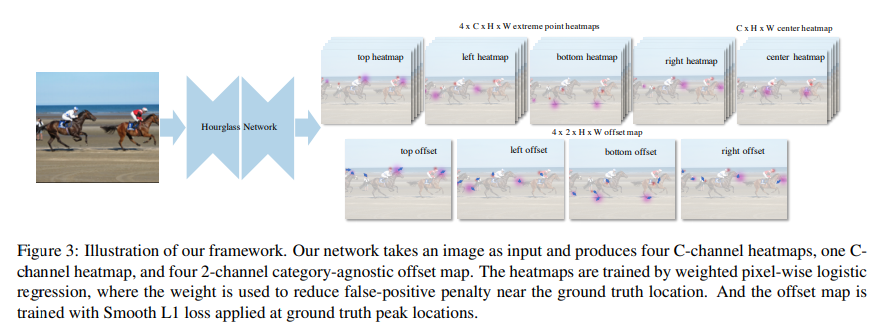

heatmap的loss如下，是一种修改后的focal loss:
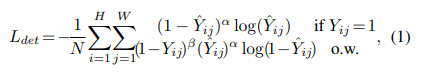

偏移损失为smooth li loss:
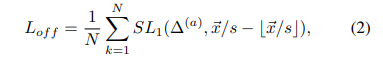

center grouping算法如下：
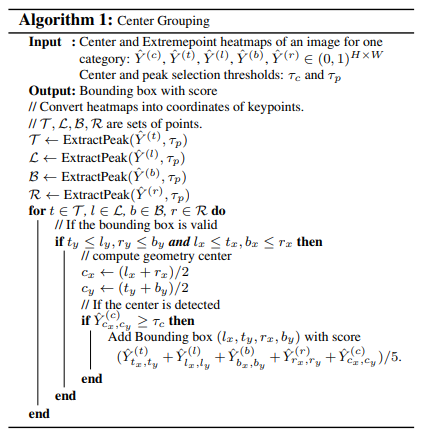

ghost box suppression<br/>
当预测的框超过3个，并且在同一排，则可能造成ghost box，如下图所示。所以文章提出了一种抑制方法，当一个bbox内包含多个框（大于3个），且多个框的score之和大于该bbox的score，就将该bbox的score除以2，最终NMS将会把它过滤。
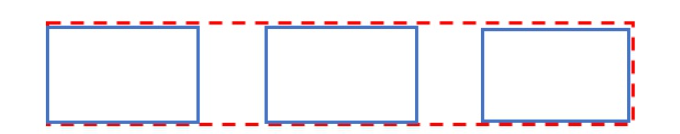

edge aggregation<br/>
当一个bbox的边与特征图的边平行或垂直时，会产生多个score较低的keypoint(top, left, right, bottom)，这些keypoint可能会被抑制，因此对于一个极值点，用左右的keypoint进行增强。


效果如下，可见红圈中的极值点被增强
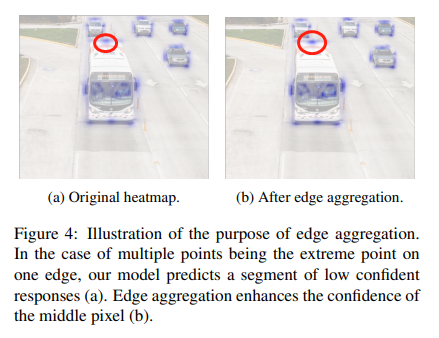